In [1]:
from pymodulon.core import IcaData
from pymodulon.io import load_json_model # save_to_json
# from pymodulon import example_data

In [2]:
ica_data = load_json_model("./data/e_coli_precise2.json")

In [3]:
import pickle

with open('./data/gene_name_bnum_d.pkl', 'rb') as handle:
    full_gene_bnum_d = pickle.load(handle)

In [4]:
gene_set_expression_mat = ica_data.X[ica_data.X.index.isin(full_gene_bnum_d.values())].copy()

bnum_gene_name_d = {v:k for k, v in full_gene_bnum_d.items()}
gene_set_expression_mat.rename(index=bnum_gene_name_d, inplace=True)

sample_serial_name_d = {i:r["sample"] for i, r in ica_data.sample_table.iterrows()}
gene_set_expression_mat.rename(columns=sample_serial_name_d, inplace=True)

gene_set_expression_mat.to_csv("./p1000_gene_set_expression.csv")
gene_set_expression_mat.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,ytf3__wt_pH7_lactate__1,ytf3__wt_pH7_lactate__2,ytf3__wt_pH55_lactate__1,ytf3__wt_pH55_lactate__2,ytf3__wt_pH55_HCl__1,ytf3__wt_pH55_HCl__2,ytf3__dyieP_pH7__1,ytf3__dyieP_pH7__2,ytf3__dyieP_pH55__1,ytf3__dyieP_pH55__2
gcd,-0.132923,0.132923,1.863635,2.005485,0.045481,-0.114450,1.786132,1.915357,0.431316,0.360564,...,-0.082728,-0.014756,1.113372,1.324673,1.169654,1.136788,0.027750,-0.050223,-0.080763,-0.149857
cyoE,-0.112552,0.112552,-1.260932,-1.443737,0.140065,-0.019818,-0.805842,-0.692509,0.182511,0.233417,...,1.382046,1.387320,1.604863,1.451135,1.353762,1.297906,1.236268,1.246019,1.589219,1.443211
cyoD,0.033905,-0.033905,-0.853543,-0.869156,0.245333,0.161810,-0.487216,-0.212208,0.410428,0.458473,...,1.284746,1.342612,1.476091,1.371222,1.159088,1.072889,1.128115,1.112217,1.302819,1.085602
cyoC,-0.097111,0.097111,-0.909923,-1.023020,0.090208,-0.065010,-0.550196,-0.418016,0.168586,0.233463,...,1.070790,1.099348,1.302649,1.177695,0.879020,0.781208,0.770184,0.771412,1.129667,1.089044
cyoB,-0.061801,0.061801,-1.126441,-1.230877,-0.084200,-0.101639,-0.703241,-0.508959,0.183416,0.123167,...,0.489907,0.483497,0.661044,0.587072,0.321271,0.219671,0.210958,0.223400,0.572170,0.433472


In [5]:
# # All replicates. Very large.
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.dpi"] = 100
# sns.set_context("paper")
# sns.set_style("white")


# cm = sns.clustermap(
#     gene_set_expression_mat,
#     figsize=(180,22),
#     linewidths=0,
#     cbar_kws={'label': 'expression'},
# #     xticklabels=False,
# #     yticklabels=False,
#     center=0,
#     cmap="vlag",
# )
# cm.ax_heatmap.tick_params(axis='both', which='both', length=0)

In [6]:
import pandas as pd

In [7]:
rep_of_interest_df = pd.read_csv("./data/REDUCED-precise1000_sample_table.csv", index_col=0)
reps_of_interest = rep_of_interest_df["sample"].tolist()
gene_exp_reps_of_interest_mat = gene_set_expression_mat[reps_of_interest]

In [8]:
# explicitly setting the order of genes
CUSTOM_GENE_ORDER = [
    'fdnG', 'fdnH', 'fdnI',
    'fdoG', 'fdoH', 'fdoI',
    'fdhF', 'hycA', 'hycB', 'hycC', 'hycD', 'hycE', 'hycF', 'hycG', 'hycH',
    'hyaA', 'hyaB', 'hyaC', 'hyaD', 'hyaE', 'hyaF',
    'hybA', 'hybB', 'hybC', 'hybD', 'hybE', 'hybF', 'hybG',
    'nuoC', 'nuoH', 'nuoL', 'nuoF', 'nuoJ', 'nuoK', 'nuoN', 'nuoI', 'nuoA', 'nuoE', 'nuoB', 'nuoM', 'nuoG',
    'ndh',
    'glpD',
    'glpA', 'glpC', 'glpB',
    'poxB',
    'dld',
    'lctD',
    'dadA',
    'gcd',
    'sdhC', 'sdhD', 'sdhA', 'sdhB',
    'cyoA', 'cyoB', 'cyoC', 'cyoD', 'cyoE',
    'cydA', 'cydB',
    'cyxA', 'cyxB',
    'narG', 'narH', 'narJ', 'narI',
    'narZ', 'narY', 'narW', 'narV',
    'napF', 'napD', 'napA', 'napG', 'napH', 'napB', 'napC',
    'nrfA', 'nrfB', 'nrfC', 'nrfD', 'nrfE', 'nrfF', 'nrfG',
    'dmsA', 'dmsB', 'dmsC',
    'torC', 'torA', 'torD',
    'frdA', 'frdB', 'frdC', 'frdD',
]

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1c3251c550> (for post_execute):


KeyboardInterrupt: 

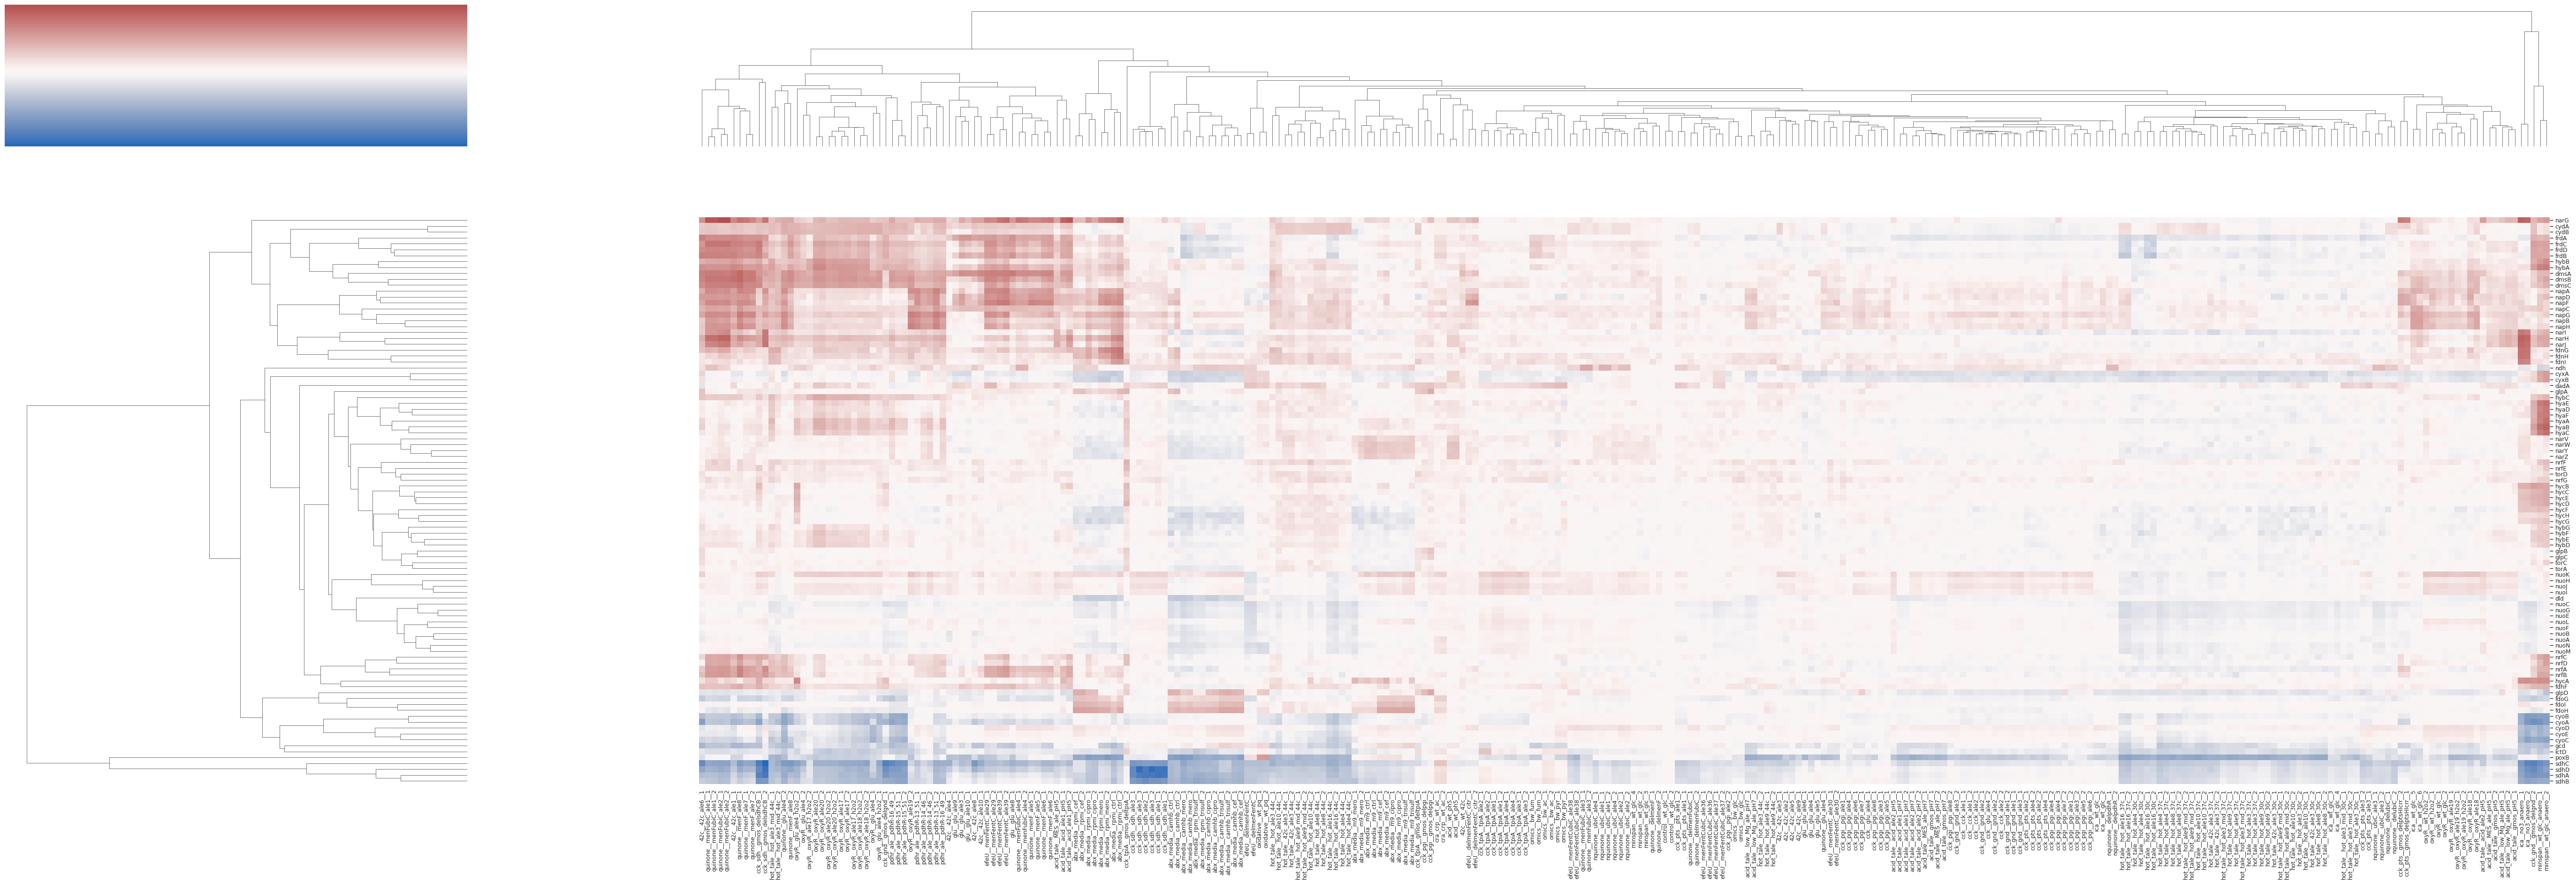

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

cm = sns.clustermap(
    gene_exp_reps_of_interest_mat,
    figsize=(70,22),
    linewidths=0,
    cbar_kws={'label': 'expression'},
    center=0,
    cmap="vlag",
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
cm.ax_heatmap.set_xlabel("samples")
cm.ax_heatmap.set_ylabel("genes")

In [ ]:
sample_replicate_d = dict()
for rep in reps_of_interest:
    key = rep[:rep.rfind("__")]
    if key not in sample_replicate_d.keys():
        sample_replicate_d[key] = [rep]
    else:
        sample_replicate_d[key].append(rep)
# sample_replicate_d

In [ ]:
# Now I have to calculate the median for each sample
sample_gene_median_exp_mat = pd.DataFrame(0.0, columns=sample_replicate_d.keys(), index=gene_exp_reps_of_interest_mat.index)
sample_gene_median_exp_mat


def _get_sample_gene_median_expr(replicates, gene):
    m = 0
    df = gene_exp_reps_of_interest_mat[replicates][gene_exp_reps_of_interest_mat.index==gene]
    if len(df) > 0:
        m = float(df.median(axis=1))
    return m
    
    
for gene, samples in sample_gene_median_exp_mat.iterrows():
    for sample in samples.index:
        sample_reps = sample_replicate_d[sample]
        sample_gene_median_exp_mat.at[gene, sample] = _get_sample_gene_median_expr(sample_reps, gene)
sample_gene_median_exp_mat

In [ ]:
sample_gene_median_exp_mat = sample_gene_median_exp_mat.reindex(CUSTOM_GENE_ORDER)

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")


cm = sns.clustermap(
    sample_gene_median_exp_mat,
#     figsize=(35,22),
    linewidths=0,
    xticklabels=True, yticklabels=True,
    cbar_kws={'label': 'expression (log-TPM)'},
    center=0,
    cmap="vlag",
    row_cluster=False
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
cm.ax_heatmap.set_xlabel("samples")
cm.ax_heatmap.set_ylabel("genes")


H = 2
W = 2.4
y0_offset = -0.63
x0_offset = 0
hm = cm.ax_heatmap.get_position()
# mpl.setp(cm.ax_heatmap.yaxis.get_majorticklabels(),fontsize=6)
# mpl.setp(cm.ax_heatmap.xaxis.get_majorticklabels(),fontsize=6)
col_dendo = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([
    col_dendo.x0 + x0_offset,
    col_dendo.y0,
    col_dendo.width*W,
    col_dendo.height*1
])
row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.015,
    row_dendo.y0 + y0_offset,
    row_dendo.width*1,
    row_dendo.height*H
])
cm.ax_heatmap.set_position([
    hm.x0 + x0_offset,
    hm.y0 + y0_offset,
    hm.width*W,
    hm.height*H
])
cm.savefig("median_gene_expression_samples_set.svg")

In [ ]:
# This logic won't combine WT and ALEs, which is what we want since these are different resutls
exp_rep_d = dict()
for rep in reps_of_interest:
    
    exp = ""
    if "ale" in rep:
        exp = rep[:rep.rfind("_ale")]
    else:
        exp = rep[:rep.rfind("__")]
    
    if exp not in exp_rep_d.keys():
        exp_rep_d[exp] = [rep]
    else:
        exp_rep_d[exp].append(rep)
# Some samples that shouldn't be grouped toegether still are.
# Haven't yet put found the logic for working 
# display(exp_rep_d)


# Have to manually update since previous parsing logic can't handle certain corner cases
del exp_rep_d["oxyR__glu"]
exp_rep_d["oxyR__glu"] = ['oxyR__glu_ale4__1', 'oxyR__glu_ale4__2']
exp_rep_d['oxyR__glu_h2o2'] = ['oxyR__glu_ale4_h2o2__1','oxyR__glu_ale4_h2o2__2']

del exp_rep_d["oxyR__oxyR"]
exp_rep_d["oxyR__oxyR"] = ['oxyR__oxyR_ale17__1',
                           'oxyR__oxyR_ale17__2',
                           'oxyR__oxyR_ale18__1',
                           'oxyR__oxyR_ale18__2',
                           'oxyR__oxyR_ale19__1',
                           'oxyR__oxyR_ale19__2',
                           'oxyR__oxyR_ale20__1',
                           'oxyR__oxyR_ale20__2']

exp_rep_d["oxyR__oxyR_h2o2"] = [
'oxyR__oxyR_ale17_h2o2__1',
'oxyR__oxyR_ale17_h2o2__2',
'oxyR__oxyR_ale18_h2o2__1',
'oxyR__oxyR_ale18_h2o2__2',
'oxyR__oxyR_ale19_h2o2__1',
'oxyR__oxyR_ale19_h2o2__2',
'oxyR__oxyR_ale20_h2o2__1',
'oxyR__oxyR_ale20_h2o2__2']

del exp_rep_d["hot_tale__hot"]
exp_rep_d["hot_tale__30c"] = [
#     'hot_tale__hot_ale3_mid_30c__1',
# 'hot_tale__hot_ale3_mid_30c__2',
    'hot_tale__hot_ale3_30c__1',
'hot_tale__hot_ale3_30c__2',
    'hot_tale__hot_ale4_30c__1',
'hot_tale__hot_ale4_30c__2',
    'hot_tale__hot_ale8_30c__1',
'hot_tale__hot_ale8_30c__2',
#     'hot_tale__hot_ale9_mid_30c__1',
# 'hot_tale__hot_ale9_mid_30c__2',
    'hot_tale__hot_ale9_30c__1',
'hot_tale__hot_ale9_30c__2',
    'hot_tale__hot_ale10_30c__1',
'hot_tale__hot_ale10_30c__2',
    'hot_tale__hot_ale16_30c__1',
'hot_tale__hot_ale16_30c__2',
]

exp_rep_d["hot_tale__37c"] = [
#     'hot_tale__hot_ale3_mid_37c__1',
# 'hot_tale__hot_ale3_mid_37c__2',
    'hot_tale__hot_ale3_37c__1',
'hot_tale__hot_ale3_37c__2',
    'hot_tale__hot_ale4_37c__1',
'hot_tale__hot_ale4_37c__2',
    'hot_tale__hot_ale8_37c__1',
'hot_tale__hot_ale8_37c__2',
#     'hot_tale__hot_ale9_mid_37c__1',
# 'hot_tale__hot_ale9_mid_37c__2',
    'hot_tale__hot_ale9_37c__1',
'hot_tale__hot_ale9_37c__2',
    'hot_tale__hot_ale10_37c__1',
'hot_tale__hot_ale10_37c__2',
    'hot_tale__hot_ale16_37c__1',
'hot_tale__hot_ale16_37c__2',
]

exp_rep_d["hot_tale__44c"] = [
# 'hot_tale__hot_ale3_mid_44c__1',
# 'hot_tale__hot_ale3_mid_44c__2',
    'hot_tale__hot_ale3_44c__1',
'hot_tale__hot_ale3_44c__2',
    'hot_tale__hot_ale4_44c__1',
'hot_tale__hot_ale4_44c__2',
    'hot_tale__hot_ale8_44c__1',
'hot_tale__hot_ale8_44c__2',
#     'hot_tale__hot_ale9_mid_44c__1',
# 'hot_tale__hot_ale9_mid_44c__2',
    'hot_tale__hot_ale9_44c__1',
'hot_tale__hot_ale9_44c__2',
    'hot_tale__hot_ale10_44c__1',
'hot_tale__hot_ale10_44c__2',
    'hot_tale__hot_ale16_44c__1',
'hot_tale__hot_ale16_44c__2'
]

In [ ]:
exp_gene_median_expr_mat = pd.DataFrame(0.0, columns=exp_rep_d.keys(), index=gene_exp_reps_of_interest_mat.index)


def _get_exp_gene_median_expr(replicates, gene):
    m = 0
    df = gene_exp_reps_of_interest_mat[replicates][gene_exp_reps_of_interest_mat.index==gene]
    if len(df) > 0:
        m = float(df.median(axis=1))
    return m
    
    
for gene, experiments in exp_gene_median_expr_mat.iterrows():
    for exp in experiments.index:
        exp_reps = exp_rep_d[exp]
        exp_gene_median_expr_mat.at[gene, exp] = _get_exp_gene_median_expr(exp_reps, gene)
exp_gene_median_expr_mat

In [ ]:
exp_gene_median_expr_mat = exp_gene_median_expr_mat.reindex(CUSTOM_GENE_ORDER)
exp_gene_median_expr_mat

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")


cm = sns.clustermap(
    exp_gene_median_expr_mat,
#     figsize=(15,22),
    linewidths=0,
    xticklabels=True, yticklabels=True,
    cbar_kws={'label': 'expression (log-TPM)'},
    center=0,
    cmap="vlag",
    row_cluster=False
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
cm.ax_heatmap.set_xlabel("experiment")
cm.ax_heatmap.set_ylabel("genes")

H = 2
W = 1.2
y0_offset = -0.635
x0_offset = 0.015
hm = cm.ax_heatmap.get_position()
# mpl.setp(cm.ax_heatmap.yaxis.get_majorticklabels(),fontsize=6)
# mpl.setp(cm.ax_heatmap.xaxis.get_majorticklabels(),fontsize=6)
col_dendo = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([
    col_dendo.x0 + x0_offset,
    col_dendo.y0,
    col_dendo.width*W,
    col_dendo.height*1
])
row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.015,
    row_dendo.y0 + y0_offset,
    row_dendo.width*1,
    row_dendo.height*H
])
cm.ax_heatmap.set_position([
    hm.x0 + x0_offset,
    hm.y0 + y0_offset,
    hm.width*W,
    hm.height*H
])
cm.savefig("median_gene_expression_exp_set.svg")
# col_color_pos = cm.ax_col_colors.get_position()
# cm.ax_col_colors.set_position([
#     col_color_pos.x0 + 0.01,
#     col_color_pos.y0 + 0.01,
#     col_color_pos.width*W,
#     col_color_pos.height*H
# ])